In [62]:
#load libraries
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
#Face Detection
face_Detection= cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
#Load the Trained Model
trainedmodel =load_model('./Emotionmodel.h5')
#Define Emotion
Emotion_LIST = ['Angry','Happy','Sad','Neutral','Surprise']
#Emotion Detection Function
def Emotion_face(in_img):
    Emotion = []
    #Convert to grayscale image
    IMGgray = cv2.cvtColor(in_img,cv2.COLOR_BGR2GRAY)
    #Detect the face from grayscale image
    faces = face_Detection.detectMultiScale(IMGgray,1.3,5)
    x=faces[0][0]
    y=faces[0][1]
    w=faces[0][2]
    h=faces[0][3]
    #cropping only the face area
    facearea = IMGgray[y:y+h,x:x+w]
    facearea = cv2.resize(facearea,(48,48),interpolation=cv2.INTER_AREA)
    if np.sum([facearea])!=0:
        face_area = facearea.astype('float')/255.0
        face_area = img_to_array(face_area)
        face_area = np.expand_dims(face_area,axis=0)
        #For prediction 
        prediction = trainedmodel.predict(face_area)[0]
        #Finding the highest prediction values
        Emotion=Emotion_LIST[prediction.argmax()]   
    else:
        Emotion='No Face Found'
    return Emotion, prediction,facearea


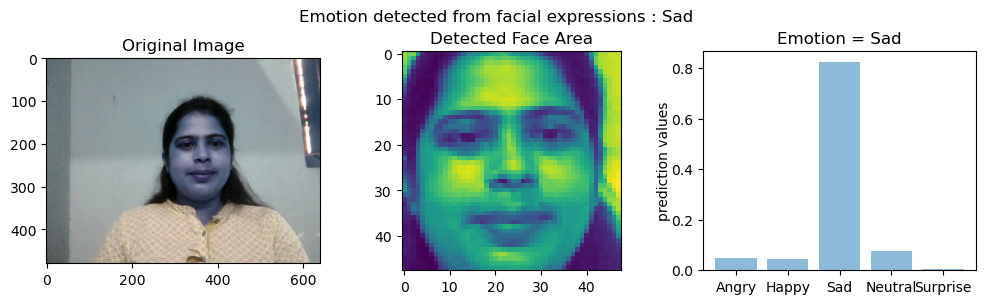

In [63]:
# Driver code
#Load Image for testing
Imageread=cv2.imread("101.jpg")
#predicting the Emotion in teh image 
F_Emotion,prediction,facearea=Emotion_face(Imageread)
#plot the Emotion detected from facial expressions
fig=plt.figure(figsize=(12, 3))
fig.suptitle('Emotion detected from facial expressions : '+str(F_Emotion), fontsize=12)
fig.subplots_adjust(top=.84)
plt.subplot(131)
plt.imshow(Imageread)
plt.title('Original Image')
plt.subplot(132)
plt.imshow(facearea)
plt.title('Detected Face Area')
y_pos = np.arange(len(Emotion_LIST))
plt.subplot(133)
plt.bar(y_pos, prediction, align='center', alpha=0.5)
plt.xticks(y_pos, Emotion_LIST)
plt.ylabel('prediction values',labelpad=0.0)
plt.title('Emotion = '+str(F_Emotion))
plt.show()


In [8]:
print(prediction)
print("\nEmotion = ",F_Emotion,"\n")

[0.09211612 0.11921957 0.60340685 0.17945012 0.00580735]


In [101]:
frame=cv2.imread('C:/Users/Eliza/Documents/PYTHON EBIN/AI assi/Facedata/train/angry/0.jpg')
print("\nEmotion = ",F_Emotion,"\n")